<a href="https://colab.research.google.com/github/Varsha-Montclair/Projects-on-Data-Analysis/blob/main/natural_gas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm

In [ ]:
df = pd.read_csv('Nat_Gas.csv')

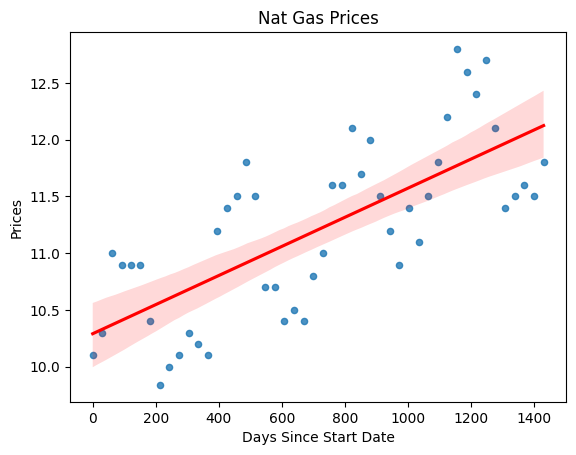

In [ ]:
# Example: create the 'Days' column (if not done)
df['Dates'] = pd.to_datetime(df['Dates'], format='%m/%d/%y')
df['Days'] = (df['Dates'] - df['Dates'].min()).dt.days

sns.regplot(x='Days', y='Prices', data=df, scatter_kws={'s': 20}, line_kws={'color': 'red'})
plt.xlabel("Days Since Start Date")
plt.ylabel("Prices")
plt.title("Nat Gas Prices")
plt.show()


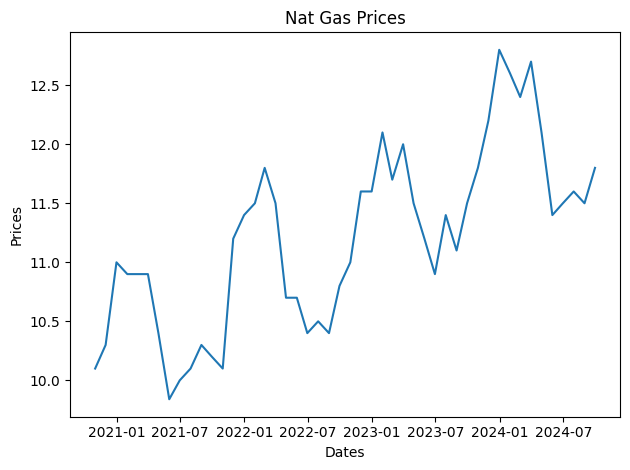

In [ ]:
plt.plot(df['Dates'], df['Prices'])
plt.xlabel("Dates")
plt.ylabel("Prices")
plt.title("Nat Gas Prices")
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [ ]:
df['Dates'] = pd.to_datetime(df['Dates'], format='%m/%d/%y')

In [ ]:
df['Days'] = (df['Dates'] - df['Dates'].min()).dt.days

In [ ]:
x = df['Dates']
print(x)

0    2020-10-31
1    2020-11-30
2    2020-12-31
3    2021-01-31
4    2021-02-28
5    2021-03-31
6    2021-04-30
7    2021-05-31
8    2021-06-30
9    2021-07-31
10   2021-08-31
11   2021-09-30
12   2021-10-31
13   2021-11-30
14   2021-12-31
15   2022-01-31
16   2022-02-28
17   2022-03-31
18   2022-04-30
19   2022-05-31
20   2022-06-30
21   2022-07-31
22   2022-08-31
23   2022-09-30
24   2022-10-31
25   2022-11-30
26   2022-12-31
27   2023-01-31
28   2023-02-28
29   2023-03-31
30   2023-04-30
31   2023-05-31
32   2023-06-30
33   2023-07-31
34   2023-08-31
35   2023-09-30
36   2023-10-31
37   2023-11-30
38   2023-12-31
39   2024-01-31
40   2024-02-29
41   2024-03-31
42   2024-04-30
43   2024-05-31
44   2024-06-30
45   2024-07-31
46   2024-08-31
47   2024-09-30
Name: Dates, dtype: datetime64[ns]


In [ ]:
X = np.array(df['Dates']).reshape(-1,1)
print(X)
y = np.array(df['Prices']).reshape(-1,1)

[['2020-10-31T00:00:00.000000000']
 ['2020-11-30T00:00:00.000000000']
 ['2020-12-31T00:00:00.000000000']
 ['2021-01-31T00:00:00.000000000']
 ['2021-02-28T00:00:00.000000000']
 ['2021-03-31T00:00:00.000000000']
 ['2021-04-30T00:00:00.000000000']
 ['2021-05-31T00:00:00.000000000']
 ['2021-06-30T00:00:00.000000000']
 ['2021-07-31T00:00:00.000000000']
 ['2021-08-31T00:00:00.000000000']
 ['2021-09-30T00:00:00.000000000']
 ['2021-10-31T00:00:00.000000000']
 ['2021-11-30T00:00:00.000000000']
 ['2021-12-31T00:00:00.000000000']
 ['2022-01-31T00:00:00.000000000']
 ['2022-02-28T00:00:00.000000000']
 ['2022-03-31T00:00:00.000000000']
 ['2022-04-30T00:00:00.000000000']
 ['2022-05-31T00:00:00.000000000']
 ['2022-06-30T00:00:00.000000000']
 ['2022-07-31T00:00:00.000000000']
 ['2022-08-31T00:00:00.000000000']
 ['2022-09-30T00:00:00.000000000']
 ['2022-10-31T00:00:00.000000000']
 ['2022-11-30T00:00:00.000000000']
 ['2022-12-31T00:00:00.000000000']
 ['2023-01-31T00:00:00.000000000']
 ['2023-02-28T00:00:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Print out the learned slope (coefficient) of the regression line
print("Slope:", model.coef_[0][0])        # 13

# Print out the learned intercept of the regression line
print("Intercept:", model.intercept_[0])  # 14

# Predict the gas price 30 days after the latest date in the dataset
next_month_days = df['Days'].max() + 30               # 15
pred_price = model.predict([[next_month_days]])       # 16
print("Predicted price next month:", pred_price[0][0])# 17

# --- Predict for a specific future date ---

# Define the future date you want to predict for (change this as needed)
future_date = pd.Timestamp("2025-03-15")  # <<== CHANGE DATE HERE

# Convert the future date to "days since the earliest date" in your dataset
future_days = (future_date - df['Dates'].min()).days

# Use the trained model to predict the price for that future day
predicted_price = model.predict([[future_days]])
print(f"Predicted price on {future_date.date()}: {predicted_price[0][0]:.2f}")

Slope: 1.4461997392672182e-17
Intercept: -12.910257039250316
Predicted price next month: -12.910257039250295
Predicted price on 2025-03-15: -12.91
